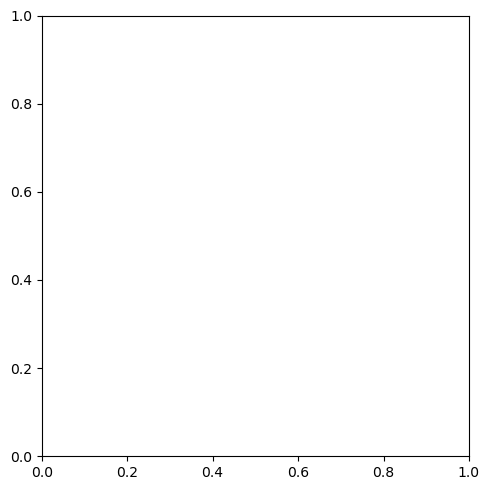

In [3]:
from matplotlib import pyplot as plt, patches
import numpy as np
plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot()

In [4]:
import pandas as pd
data = pd.read_csv('r_vs_t.txt')

In [5]:
data

,t,r
0,1.701675e+27,1450000.0
1,3.405698e+27,1451000.0
2,5.112071e+27,1452000.0
3,6.820795e+27,1453000.0
4,8.531871e+27,1454000.0
...,...,...
95,1.742987e+29,1545000.0
96,1.762332e+29,1546000.0
97,1.781702e+29,1547000.0
98,1.801096e+29,1548000.0


In [6]:
liquid_height = (data['r'] - 1450*10**3) / 10**4 #e-04
time = data['t'] / 10**27

In [7]:
liquid_height

0     0.0
1     0.1
2     0.2
3     0.3
4     0.4
     ... 
95    9.5
96    9.6
97    9.7
98    9.8
99    9.9
Name: r, Length: 100, dtype: float64

In [8]:
time

0       1.701675
1       3.405698
2       5.112071
3       6.820795
4       8.531871
         ...    
95    174.298738
96    176.233197
97     178.17016
98    180.109628
99    182.051602
Name: t, Length: 100, dtype: object

In [9]:
df = pd.DataFrame({'t':time, 'r':liquid_height})

In [10]:
def linear_model(x, a, b):
    return a * x + b

In [11]:
t = np.arange(100) / 5

from scipy.optimize import curve_fit
params, covariance = curve_fit(linear_model, t, liquid_height, absolute_sigma = True)
print("parameters:")
print(f"{params[0]:.5f}")
print(f"{params[1]:.5f}")

parameters:
0.50000
0.00000


In [12]:
params2, covariance2 = curve_fit(linear_model, t, time, absolute_sigma = True)
print("parameters:")
print(f"{params2[0]:.5f}")
print(f"{params2[1]:.5f}")

parameters:
9.10730
-0.24873


In [28]:
def log_model(x, a, b):
    return a * np.log(x) + b

In [29]:
test = pd.read_csv('T_distr.csv')

In [32]:
test_x = np.arange(0,10)

test_p, test_c = curve_fit(log_model, test_x, test[0:10], absolute_sigma = True)
print(test_p[0])
print(test_p[1])

C:\Users\mediu\AppData\Local\Temp\ipykernel_1440\3398507430.py:2: RuntimeWarning: divide by zero encountered in log
  return a * np.log(x) + b


ValueError: object too deep for desired array

error: Result from function call is not a proper array of floats.

In [19]:
ocean_height = 10 #e-04

In [76]:
def make_frame(t):
    ax.clear()
    circle1 = patches.Circle((15, 15), radius=5 + ocean_height, color='#B0DAEC')
    circle2 = patches.Circle((15, 15), radius=5 + linear_model(t, params[0], params[1]), color='#4D94AE')
    circle3 = patches.Circle((15, 15), radius=5, color='#0E323F')
    ax.add_patch(circle1)
    ax.add_patch(circle2)
    ax.add_patch(circle3)
    ax.set_title('Time: ' + str(linear_model(t, params2[0], params2[1])) + '  10^27 s')
    ax.axis('equal')
    return mplfig_to_npimage(fig)

In [77]:
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

In [78]:
animation = VideoClip(make_frame, duration = 20)

In [79]:
animation.ipython_display(fps = 5, loop = True, autoplay = True)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4
